In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess

plt.rcParams.update({'font.size': 14})

In [120]:
### Palette for Paper

c0=[0,  0,  0 ] #black  %Thermal %Bacteria Concentration = 0
c1=[155, 98, 167] #purple %Bacteria Concentration = 0.05*\rho_{max}
c2=[77, 138, 198] #blue   %Bacteria Concentration = 0.1*\rho_{max}
c3=[140, 193, 104] #green %Bacteria Concentration = 0.2*\rho_{max}
c4=[230, 130, 50] #orange %Bacteria Concentration = 0.5*\rho_{max}
c5=[218, 34, 34] #red     %Bacteria Concentration = 1*\rho_{max}

def rgb2hex(v):
    return "#{:02x}{:02x}{:02x}".format(v[0],v[1],v[2])

ColorPalette=[ rgb2hex(c) for c in [c0, c1, c2, c3, c4, c5] ]
print(ColorPalette)

def colorfunction(eT):
    if np.isclose(eT,0):
        return ColorPalette[0]
    elif np.isclose(eT,1):
        return ColorPalette[1]
    elif np.isclose(eT,3):
        return ColorPalette[2]
    elif np.isclose(eT,5):
        return ColorPalette[3]
    elif np.isclose(eT,10):
        return ColorPalette[4]
    elif np.isclose(eT,15):
        return ColorPalette[5]
    else:
        return 'pink'

['#000000', '#9b62a7', '#4d8ac6', '#8cc168', '#e68232', '#da2222']


In [2]:
eTPaperList=[0.0,1.0,3.0,5.0,10.0, 15.0]


# Stress vs strain

In [94]:
dens=0.40
dd=2.0      # 2.0 is not well equilibrated
di=20
nA=10000
Lxhi=0.5*np.sqrt(nA/dens)

filesList = subprocess.check_output("ls /Users/ivan/Dropbox/Mac/Documents/SpinningClusters/Simulations/Test_8/ResultsCluFrom_qA5_dp0.50_dens{:.2f}_eT*_nA{:d}_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_*_ts10000000/StressTensor_C*_eT0.00_d[x-y]_dd{:.1f}_di{:d}_*.dat".format(dens,nA,dd,di), shell=True)
filesList=filesList.split()
filesList=[a.decode("utf-8") for a in filesList]
for f in filesList:
    print(f[70:])

folder='/Users/ivan/Dropbox/Mac/Documents/SpinningClusters/Simulations/Test_8'

ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_200_ts10000000/StressTensor_C1_eT0.00_dx_dd2.0_di20_100.dat
ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_200_ts10000000/StressTensor_C1_eT0.00_dy_dd2.0_di20_100.dat
ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_201_ts10000000/StressTensor_C1_eT0.00_dx_dd2.0_di20_100.dat
ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_201_ts10000000/StressTensor_C1_eT0.00_dy_dd2.0_di20_100.dat
ResultsCluFrom_qA5_dp0.50_dens0.40_eT3.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_201_ts10000000/StressTensor_C1_eT0.00_dx_dd2.0_di20_100.dat
ResultsCluFrom_qA5_dp0.50_dens0.40_eT3.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_201_ts10000000/StressTensor_C1_eT0.00_dy_dd2.0_di20_100.dat
ResultsCluFrom_qA5_dp0.50_dens0.40_eT3.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_202_ts10000000/StressTensor_C1_eT0.00_dx_dd2.0_di20_

In [63]:
import re
r1 = re.compile('[_]')
r2 = re.compile(r'(([-+]?\d+\.\d+)|([-+]?\d+))')

stressdatadic={}
eTfromList=[]

#rotDf = pd.DataFrame([], columns=['ts','AngMomAvg','OmegaAvg','NSamples'])

def createkey_stressstats(eTfrom):
    assert isinstance(eTfrom,float)
    return 'eTfrom{:.2f}'.format(eTfrom)

for file in filesList:
    
    # extract info from file and folder name
    filepattern = subprocess.check_output(" echo {:s} | sed 's/.*\/StressTensor_//' | sed 's/.dat//'".format(folder+'/'+file), shell=True)
    filepattern=filepattern.split()[0]
    filepattern = filepattern.decode("utf-8")
    for s in r1.split(filepattern):
        if s.startswith('eT'):
            eTstretch=float(r2.split(s)[1])
        if s in ['dx','dy','dxy','dxAy']:
            stretchtype=s
        if s[0].isdigit():
            realstretch=int(s)
    folderpattern = subprocess.check_output(" echo {:s} | sed 's/\/StressTensor_.*//' | sed 's/.*Test_8\///'".format(folder+'/'+file), shell=True)
    folderpattern=folderpattern.split()[0]
    folderpattern = folderpattern.decode("utf-8")
    for s in r1.split(folderpattern):
        if s.startswith('eT'):
            eTfrom=float(r2.split(s)[1])
        if s.startswith('ts'):
            tsfrom=int(r2.split(s)[1])
        if s[0].isdigit():
            if len(s)>2:
                realfrom=int(s)

    # creat dic entry if does not exist 
    key=createkey_stressstats(eTfrom)
    if key not in stressdatadic.keys():
        stressdatadic[key]=[[0, 0, 0, 0, 0]] # columns=['ts','Spar','Sperp','Strans','Nreals'])
        eTfromList.append(eTfrom)
    
    print(file)
    print(stretchtype)
    print(key)
    
    df=pd.read_csv(file,names=['ts','Sxx','Syy','Szz','Sxy','Sxz','Syz'],sep=' ',comment='#')
    for j in range(len(df)):
        dfline=df.iloc[j]
        time=dfline.ts
        index = np.argwhere(np.isclose(time , np.array(stressdatadic[key])[:,0], atol=1e-3, rtol=1e-20) )
        if len(index)==0:
            if stretchtype=='dx':
                stressdatadic[key].append([time,dfline.Sxx,dfline.Syy,dfline.Sxy,1])
            if stretchtype=='dy':
                stressdatadic[key].append([time,dfline.Syy,dfline.Sxx,dfline.Sxy,1])
        elif len(index)==1 and len(index[0])==1:
            i=index[0][0]
            if stretchtype=='dx':
                stressdatadic[key][i][1]+=dfline.Sxx
                stressdatadic[key][i][2]+=dfline.Syy
            elif stretchtype=='dy':
                stressdatadic[key][i][1]+=dfline.Syy
                stressdatadic[key][i][2]+=dfline.Sxx
            else:
                assert False, "ERROR: stretchtype not dx or dy for file\n{:s}".format(file)
            stressdatadic[key][i][3]+=dfline.Sxy
            stressdatadic[key][i][4]+=1
        else:
            assert False

    
for key in stressdatadic.keys():
    for row in stressdatadic[key]: 
        if row[4]>0:
            row[1]/=row[4]
            row[2]/=row[4]
            row[3]/=row[4]
    stressdatadic[key]=pd.DataFrame(stressdatadic[key],columns=['ts','Spar','Sperp','Strans','Nreals'])

/Users/ivan/Dropbox/Mac/Documents/SpinningClusters/Simulations/Test_8/ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_200_ts10000000/StressTensor_C1_eT0.00_dx_dd2.0_di20_100.dat
dx
eTfrom0.00
eTfrom0.00
/Users/ivan/Dropbox/Mac/Documents/SpinningClusters/Simulations/Test_8/ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_200_ts10000000/StressTensor_C1_eT0.00_dy_dd2.0_di20_100.dat
dy
eTfrom0.00
eTfrom0.00
/Users/ivan/Dropbox/Mac/Documents/SpinningClusters/Simulations/Test_8/ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_201_ts10000000/StressTensor_C1_eT0.00_dx_dd2.0_di20_100.dat
dx
eTfrom0.00
eTfrom0.00
/Users/ivan/Dropbox/Mac/Documents/SpinningClusters/Simulations/Test_8/ResultsCluFrom_qA5_dp0.50_dens0.40_eT0.00_nA10000_rp0.15_ra0.15_ep-10.0_ea20.0_T1.0_201_ts10000000/StressTensor_C1_eT0.00_dy_dd2.0_di20_100.dat
dy
eTfrom0.00
eTfrom0.00
/Users/ivan/Dropbox/Mac/Documents/SpinningCl

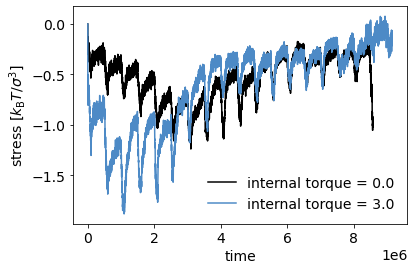

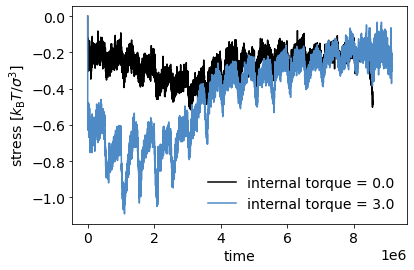

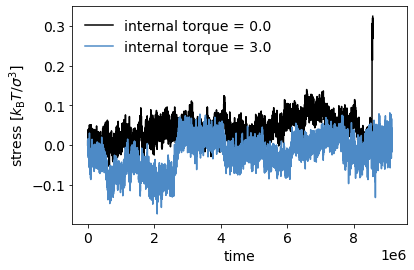

In [142]:
# stress vs time

for eTfrom in eTfromList:
    data=stressdatadic[createkey_stressstats(eTfrom)]
 
    plt.figure(1)
    #plt.errorbar(datafilter.strain, datafilter.Spar, yerr=datafilter.SparStd, fmt='o-', label='internal torque = {:.1f}'.format(eTfrom), color=colorfunction(eTfrom))
    plt.plot(data.ts, data.Spar, '-', label='internal torque = {:.1f}'.format(eTfrom), color=colorfunction(eTfrom))
    plt.xlabel('time')
    plt.ylabel(r'stress [$k_\mathrm{B}T/\sigma^3$]')
    plt.legend(frameon=False)
    
    plt.figure(2)
    #plt.errorbar(datafilter.strain, datafilter.Sperp, yerr=datafilter.SperpStd, fmt='o-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.plot(data.ts, data.Sperp, '-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.xlabel('time')
    plt.ylabel(r'stress [$k_\mathrm{B}T/\sigma^3$]')
    plt.legend(frameon=False)
    
    plt.figure(3)
    #plt.errorbar(datafilter.strain, datafilter.Strans, yerr=datafilter.StransStd, fmt='o-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.plot(data.ts, data.Strans, '-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.xlabel('time')
    plt.ylabel(r'stress [$k_\mathrm{B}T/\sigma^3$]')
    plt.legend(frameon=False)

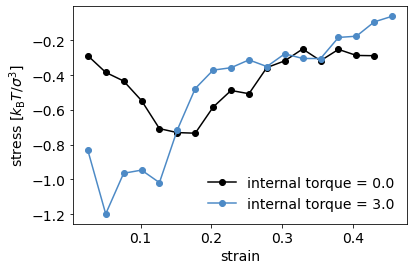

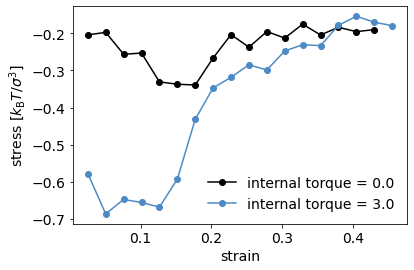

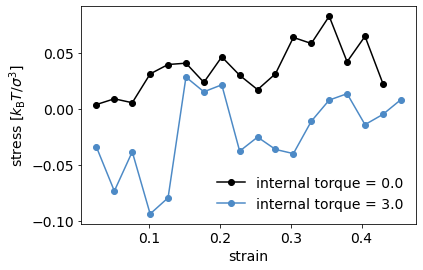

In [137]:
# stress vs strain

for eTfrom in eTfromList:
    data=stressdatadic[createkey_stressstats(eTfrom)]
    
    datafilter=[]
    for i in range(1,di+1):
        subdata=data[(i*5e5-1e5<data.ts) & (data.ts<i*5e5)]
        SparAvg=subdata.Spar.mean()
        SperpAvg=subdata.Sperp.mean()
        StransAvg=subdata.Strans.mean()
        SparStd=subdata.Spar.std()
        SperpStd=subdata.Sperp.std()
        StransStd=subdata.Strans.std()
        datafilter.append([i*dd/Lxhi,SparAvg,SperpAvg,StransAvg,SparStd,SperpStd,StransStd])
    datafilter=pd.DataFrame(datafilter, columns=['strain','Spar','Sperp','Strans','SparStd','SperpStd','StransStd'])
        
    plt.figure(1)
    #plt.errorbar(datafilter.strain, datafilter.Spar, yerr=datafilter.SparStd, fmt='o-', label='internal torque = {:.1f}'.format(eTfrom), color=colorfunction(eTfrom))
    plt.plot(datafilter.strain, datafilter.Spar, 'o-', label='internal torque = {:.1f}'.format(eTfrom), color=colorfunction(eTfrom))
    plt.xlabel('strain')
    plt.ylabel(r'stress [$k_\mathrm{B}T/\sigma^3$]')
    plt.legend(frameon=False)
    
    plt.figure(2)
    #plt.errorbar(datafilter.strain, datafilter.Sperp, yerr=datafilter.SperpStd, fmt='o-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.plot(datafilter.strain, datafilter.Sperp, 'o-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.xlabel('strain')
    plt.ylabel(r'stress [$k_\mathrm{B}T/\sigma^3$]')
    plt.legend(frameon=False)
    
    plt.figure(3)
    #plt.errorbar(datafilter.strain, datafilter.Strans, yerr=datafilter.StransStd, fmt='o-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.plot(datafilter.strain, datafilter.Strans, 'o-', label='internal torque = {:.1f}'.format(eTfrom),color=colorfunction(eTfrom))
    plt.xlabel('strain')
    plt.ylabel(r'stress [$k_\mathrm{B}T/\sigma^3$]')
    plt.legend(frameon=False)